# **Métrica Ponderada para Representatividad Distributiva**
## **Guía de Uso General**

### **¿Qué hace esta herramienta?**

Esta herramienta calcula una **métrica de tendencia central ponderada** que es más robusta que la media aritmética simple para distribuciones asimétricas. Es especialmente útil para:

- 📊 **Datos de ingresos** y variables económicas
- 🏥 **Tiempos de espera** y datos médicos  
- 🌐 **Datos web** (tiempo de respuesta, tráfico)
- 📈 **Datos financieros** (precios, rendimientos)
- 🔬 **Cualquier distribución asimétrica**

### **¿Cómo funciona?**

1. **Analiza automáticamente** las características de tu distribución
2. **Detecta el nivel de asimetría** (baja, moderada, alta)
3. **Selecciona los parámetros óptimos** según las características detectadas
4. **Combina inteligentemente** media, mediana y moda (cuando es apropiado)
5. **Proporciona una métrica más representativa** que la media simple

### **Ventajas principales:**

✅ **Más robusta** ante valores extremos  
✅ **Se adapta automáticamente** a diferentes tipos de distribuciones  
✅ **Fácil de usar** - solo necesitas tus datos  
✅ **Respaldo matemático sólido** con validación estadística  
✅ **Interpretable** - explica por qué eligió cada configuración

In [9]:
# ========== CONFIGURACIÓN INICIAL ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importar nuestras funciones desarrolladas
from defs import *

print("🚀 SISTEMA DE MÉTRICA PONDERADA CARGADO")
print("=" * 50)
print("✅ Todas las funciones han sido importadas correctamente")
print("✅ Listo para analizar tus datos")
print("\n📋 FUNCIONES PRINCIPALES DISPONIBLES:")
print("   • metrica_ajustada() - Análisis automático completo")
print("   • metrica_ponderada() - Control manual de parámetros")
print("   • Funciones auxiliares: mad(), madn(), bowley_skew(), etc.")
print("=" * 50)

🚀 SISTEMA DE MÉTRICA PONDERADA CARGADO
✅ Todas las funciones han sido importadas correctamente
✅ Listo para analizar tus datos

📋 FUNCIONES PRINCIPALES DISPONIBLES:
   • metrica_ajustada() - Análisis automático completo
   • metrica_ponderada() - Control manual de parámetros
   • Funciones auxiliares: mad(), madn(), bowley_skew(), etc.


## **Paso 1: Cargar tus datos** 📂

### **¡IMPORTANTE! Elige UNA opción:**

🎯 **¿Tienes tus propios datos para analizar?** 
- ✅ **SÍ** → Usa la **Opción 1** (CSV/Excel) o **Opción 2** (Lista) con tus datos reales
- ❌ **NO** → Usa la **Opción 3** (Datos de ejemplo) para explorar la herramienta

**⚠️ Los datos que elijas en este paso se usarán en TODO el análisis posterior.**

Elige **SOLO UNA** de las siguientes opciones:

In [ ]:
# ========== OPCIÓN 1: CARGAR DESDE ARCHIVO CSV/EXCEL ==========
print("📁 OPCIÓN 1: Cargar datos desde archivo CSV o Excel")
print("=" * 60)

def cargar_desde_archivo(ruta_archivo, columna=None, separador=',', encoding='latin1'):
    """
    Carga datos desde un archivo CSV o Excel
    
    Parámetros:
    - ruta_archivo: ruta al archivo (ej: 'datos.csv', 'datos.xlsx')
    - columna: nombre de la columna a analizar (si es None, usa la primera columna numérica)
    - separador: separador para CSV (por defecto ',')
    - encoding: codificación del archivo (por defecto 'latin1', prueba 'utf-8' si hay problemas)
    """
    try:
        # Detectar tipo de archivo
        if ruta_archivo.endswith('.xlsx') or ruta_archivo.endswith('.xls'):
            df = pd.read_excel(ruta_archivo)
            print(f"✅ Archivo Excel cargado: {ruta_archivo}")
        elif ruta_archivo.endswith('.json'):
            df = pd.read_json(ruta_archivo)
            print(f"✅ Archivo JSON cargado: {ruta_archivo}")
        else:
            df = pd.read_csv(ruta_archivo, sep=separador, encoding=encoding)
            print(f"✅ Archivo CSV cargado: {ruta_archivo}")
        
        print(f"📊 Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")
        print(f"📋 Columnas disponibles: {list(df.columns)}")
        
        # Seleccionar columna
        if columna is None:
            # Buscar primera columna numérica
            columnas_numericas = df.select_dtypes(include=[np.number]).columns
            if len(columnas_numericas) == 0:
                raise ValueError("No se encontraron columnas numéricas")
            columna = columnas_numericas[0]
            print(f"🎯 Usando columna automática: '{columna}'")
        else:
            if columna not in df.columns:
                raise ValueError(f"Columna '{columna}' no encontrada")
            print(f"🎯 Usando columna especificada: '{columna}'")
        
        # Extraer datos y limpiar
        datos = df[columna].dropna()
        datos = datos[pd.to_numeric(datos, errors='coerce').notna()]  # Solo valores numéricos
        datos = pd.to_numeric(datos)
        
        print(f"✅ Datos extraídos: {len(datos)} valores válidos")
        print(f"📈 Rango: {datos.min():.2f} - {datos.max():.2f}")
        print(f"📊 Media inicial: {datos.mean():.2f}")
        
        return datos, df
        
    except Exception as e:
        print(f"❌ Error al cargar archivo: {e}")
        print("\n💡 Consejos:")
        print("   • Verifica que la ruta del archivo sea correcta")
        print("   • Para archivos con caracteres especiales, prueba encoding='utf-8'")
        print("   • Asegúrate de que el archivo tenga columnas numéricas")
        return None, None

# ========== ¿TIENES UN ARCHIVO PARA CARGAR? ==========
print("\n🔥 ¿QUIERES CARGAR TU PROPIO ARCHIVO?")
print("=" * 50)
print("📝 EJEMPLOS DE USO:")
print("   datos, df = cargar_desde_archivo('mi_archivo.csv', 'mi_columna')")
print("   datos, df = cargar_desde_archivo('datos.xlsx', 'ingresos')")
print("   datos, df = cargar_desde_archivo('archivo.json', 'valores')")
print("   datos, df = cargar_desde_archivo('archivo.csv', encoding='utf-8')")

print("\n🎯 MODIFICA Y EJECUTA UNA DE ESTAS LÍNEAS:")
print("=" * 50)

# ========== DESCOMENTA Y MODIFICA UNA DE ESTAS LÍNEAS ==========
# EJEMPLO 1: Archivo CSV con columna específica
# datos, df_original = cargar_desde_archivo('mi_archivo.csv', 'nombre_columna')

# EJEMPLO 2: Archivo Excel 
# datos, df_original = cargar_desde_archivo('datos.xlsx', 'columna_valores')

# EJEMPLO 3: Archivo CSV con detección automática de columna
# datos, df_original = cargar_desde_archivo('mi_archivo.csv')

# EJEMPLO 4: Archivo CSV con encoding específico
# datos, df_original = cargar_desde_archivo('archivo.csv', 'columna', encoding='utf-8')

# ========== LÍNEA DE EJEMPLO (DESCOMÉNTALA SI TIENES EL ARCHIVO) ==========
# datos, df_original = cargar_desde_archivo('SDEMT418.csv', 'ing_x_hrs')

# ========== VERIFICAR SI SE CARGARON DATOS ==========
try:
    if 'datos' in locals() and datos is not None:
        print(f"\n✅ ¡PERFECTO! Tus datos han sido cargados exitosamente")
        print(f"📊 Observaciones: {len(datos):,}")
        print(f"📈 Estos datos se usarán en todo el análisis")
        datos_origen = "archivo_usuario"
        # Saltar a las celdas de análisis automático
        print(f"\n🚀 PUEDES SALTAR DIRECTAMENTE AL PASO 2 (Análisis Automático)")
    else:
        print(f"\n❌ No se cargaron datos desde archivo")
        print(f"💡 Si no tienes archivo, continúa con las opciones 2 o 3")
        datos_origen = None
except:
    print(f"\n❌ No se cargaron datos desde archivo")
    print(f"💡 Si no tienes archivo, continúa con las opciones 2 o 3") 
    datos_origen = None

📝 EJEMPLO DE USO:
   datos, df = cargar_desde_archivo('mi_archivo.csv', 'mi_columna')
   datos, df = cargar_desde_archivo('datos.xlsx', 'ingresos')
   datos, df = cargar_desde_archivo('archivo.csv', encoding='latin1')
✅ Archivo CSV cargado: SDEMT418.csv
📊 Dimensiones: 390612 filas, 104 columnas
📋 Columnas disponibles: ['r_def', 'loc', 'mun', 'est', 'est_d', 'ageb', 't_loc', 'cd_a', 'ent', 'con', 'upm', 'd_sem', 'n_pro_viv', 'v_sel', 'n_hog', 'h_mud', 'n_ent', 'per', 'n_ren', 'c_res', 'par_c', 'sex', 'eda', 'nac_dia', 'nac_mes', 'nac_anio', 'l_nac_c', 'cs_p12', 'cs_p13_1', 'cs_p13_2', 'cs_p14_c', 'cs_p15', 'cs_p16', 'cs_p17', 'n_hij', 'e_con', 'cs_ad_mot', 'cs_p20_des', 'cs_ad_des', 'cs_nr_mot', 'cs_p22_des', 'cs_nr_ori', 'ur', 'zona', 'salario', 'fac', 'clase1', 'clase2', 'clase3', 'pos_ocu', 'seg_soc', 'rama', 'c_ocu11c', 'ing7c', 'dur9c', 'emple7c', 'medica5c', 'buscar5c', 'rama_est1', 'rama_est2', 'dur_est', 'ambito1', 'ambito2', 'tue1', 'tue2', 'tue3', 'busqueda', 'd_ant_lab', 'd_c

In [ ]:
# ========== OPCIÓN 2: DATOS DESDE LISTA O ARRAY ==========
print("📋 OPCIÓN 2: Cargar datos desde lista o array")
print("=" * 60)

# ========== VERIFICAR SI YA TIENES DATOS ==========
if 'datos_origen' in locals() and datos_origen == "archivo_usuario":
    print("✅ Ya tienes datos cargados desde archivo")
    print("⚠️  Esta celda es opcional - ya puedes ir al Paso 2")
    print("🔄 Solo ejecuta esta celda si quieres CAMBIAR a datos de lista")
    print()

def cargar_desde_lista(datos_lista, nombre_variable="datos"):
    """
    Convierte una lista o array en formato apropiado para análisis
    
    Parámetros:
    - datos_lista: lista, tuple, o array con los datos
    - nombre_variable: nombre descriptivo para los datos
    """
    try:
        # Convertir a pandas Series
        datos = pd.Series(datos_lista)
        
        # Limpiar datos (quitar NaN y valores no numéricos)
        datos_limpios = datos.dropna()
        datos_limpios = pd.to_numeric(datos_limpios, errors='coerce').dropna()
        
        print(f"✅ Datos cargados desde lista: '{nombre_variable}'")
        print(f"📊 Valores originales: {len(datos)}")
        print(f"📊 Valores válidos: {len(datos_limpios)}")
        print(f"📈 Rango: {datos_limpios.min():.2f} - {datos_limpios.max():.2f}")
        
        return datos_limpios
        
    except Exception as e:
        print(f"❌ Error al procesar lista: {e}")
        return None

print("📝 EJEMPLOS DE USO:")
print("=" * 40)

# Ejemplo 1: Lista de números
ejemplo_ingresos = [25000, 30000, 28000, 45000, 35000, 120000, 22000, 38000, 42000]
print(f"🔸 Ejemplo 1 - Ingresos mensuales:")
datos_ejemplo1 = cargar_desde_lista(ejemplo_ingresos, "ingresos_mensuales")

# Ejemplo 2: Datos con valores atípicos
ejemplo_tiempos = [2.1, 3.5, 2.8, 4.1, 3.2, 25.6, 3.8, 2.9, 3.7, 4.5, 100.2, 3.1]
print(f"\n🔸 Ejemplo 2 - Tiempos de respuesta (seg):")
datos_ejemplo2 = cargar_desde_lista(ejemplo_tiempos, "tiempos_respuesta")

print(f"\n🎯 PARA USAR TUS PROPIOS DATOS DE LISTA:")
print("=" * 50)
print(f"   mis_datos = [valor1, valor2, valor3, ...]")
print(f"   datos = cargar_desde_lista(mis_datos, 'nombre_descriptivo')")
print(f"   datos_origen = 'lista_usuario'")

print(f"\n💡 DESCOMENTA Y MODIFICA ESTAS LÍNEAS CON TUS DATOS:")
print("-" * 50)
# EJEMPLO: Reemplaza con tus datos reales
# mis_datos = [1, 2, 3, 4, 5, 100, 2, 3, 4, 50]  # Reemplaza con tus datos
# datos = cargar_desde_lista(mis_datos, "mi_variable")
# datos_origen = "lista_usuario"
# print(f"✅ Tus datos de lista han sido cargados y se usarán en el análisis")

# Verificar estado de datos
if 'datos_origen' not in locals() or datos_origen != "archivo_usuario":
    print(f"\n❌ Aún no has cargado tus datos de lista")
    print(f"💡 Si no tienes datos propios, continúa con la Opción 3 (datos de ejemplo)")

📝 EJEMPLOS DE USO:

🔸 Ejemplo 1 - Ingresos mensuales:
✅ Datos cargados desde lista: 'ingresos_mensuales'
📊 Valores originales: 9
📊 Valores válidos: 9
📈 Rango: 22000.00 - 120000.00

🔸 Ejemplo 2 - Tiempos de respuesta (seg):
✅ Datos cargados desde lista: 'tiempos_respuesta'
📊 Valores originales: 12
📊 Valores válidos: 12
📈 Rango: 2.10 - 100.20

💡 Para usar tus propios datos:
   mis_datos = [valor1, valor2, valor3, ...]
   datos = cargar_desde_lista(mis_datos, 'nombre_descriptivo')


In [ ]:
# ========== OPCIÓN 3: GENERAR DATOS DE EJEMPLO ==========
print("🎲 OPCIÓN 3: Datos de ejemplo para explorar la herramienta")
print("=" * 60)

# ========== VERIFICAR SI YA TIENES DATOS ==========
if 'datos_origen' in locals() and datos_origen in ["archivo_usuario", "lista_usuario"]:
    print("✅ Ya tienes datos cargados desde tu archivo/lista")
    print("⚠️  Esta celda es opcional - ya puedes ir al Paso 2")
    print("🔄 Solo ejecuta esta celda si quieres CAMBIAR a datos de ejemplo")
    print()
else:
    print("🎯 No se detectaron datos propios cargados")
    print("✅ Esta opción te permitirá explorar la herramienta con datos de ejemplo")
    print()

def generar_datos_ejemplo(tipo="ingresos", n=1000, semilla=42):
    """
    Genera datos de ejemplo para probar la herramienta
    
    Parámetros:
    - tipo: "ingresos", "tiempos", "precios", "asimetrico_alto", "normal"
    - n: número de observaciones
    - semilla: semilla para reproducibilidad
    """
    np.random.seed(semilla)
    
    if tipo == "ingresos":
        # Distribución log-normal (típica de ingresos)
        datos = np.random.lognormal(mean=10, sigma=0.8, size=n)
        nombre = "Distribución de Ingresos (log-normal)"
        unidad = "pesos"
        
    elif tipo == "tiempos":
        # Distribución exponencial (típica de tiempos de espera)
        datos = np.random.exponential(scale=5, size=n)
        nombre = "Tiempos de Respuesta (exponencial)"
        unidad = "segundos"
        
    elif tipo == "precios":
        # Distribución gamma (típica de precios)
        datos = np.random.gamma(shape=2, scale=100, size=n)
        nombre = "Precios de Productos (gamma)"
        unidad = "pesos"
        
    elif tipo == "asimetrico_alto":
        # Distribución muy asimétrica con outliers
        base = np.random.exponential(scale=2, size=int(n*0.9))
        outliers = np.random.exponential(scale=20, size=int(n*0.1)) + 50
        datos = np.concatenate([base, outliers])
        np.random.shuffle(datos)
        nombre = "Distribución Altamente Asimétrica"
        unidad = "unidades"
        
    elif tipo == "normal":
        # Distribución normal para comparación
        datos = np.random.normal(loc=50, scale=15, size=n)
        datos = datos[datos > 0]  # Solo valores positivos
        nombre = "Distribución Normal"
        unidad = "unidades"
        
    else:
        raise ValueError(f"Tipo '{tipo}' no reconocido. Usa: ingresos, tiempos, precios, asimetrico_alto, normal")
    
    datos = pd.Series(datos)
    
    print(f"✅ Datos generados: {nombre}")
    print(f"📊 Observaciones: {len(datos)}")
    print(f"📈 Rango: {datos.min():.2f} - {datos.max():.2f} {unidad}")
    print(f"📊 Media: {datos.mean():.2f} {unidad}")
    print(f"📊 Mediana: {datos.median():.2f} {unidad}")
    print(f"📊 Asimetría: {datos.skew():.3f}")
    
    return datos

# ========== DECISIÓN AUTOMÁTICA DE DATOS ==========
if 'datos_origen' not in locals() or datos_origen is None:
    print("🎲 GENERANDO DATOS DE EJEMPLO AUTOMÁTICAMENTE:")
    print("=" * 50)
    
    print("🔸 Tipo 1: Distribución de ingresos")
    datos_ingresos = generar_datos_ejemplo("ingresos", n=1000)
    
    print(f"\n🔸 Tipo 2: Tiempos de respuesta")
    datos_tiempos = generar_datos_ejemplo("tiempos", n=500)
    
    print(f"\n🔸 Tipo 3: Distribución altamente asimétrica")
    datos_asimetricos = generar_datos_ejemplo("asimetrico_alto", n=800)
    
    # Seleccionar datos por defecto para el análisis
    datos = datos_ingresos  
    datos_origen = "ejemplo_ingresos"
    nombre_datos = "Distribución de Ingresos (Ejemplo)"
    
    print(f"\n🎯 DATOS SELECCIONADOS AUTOMÁTICAMENTE:")
    print("=" * 50)
    print(f"✅ Usando: {nombre_datos}")
    print(f"📊 {len(datos)} observaciones listas para analizar")
    print(f"📈 Estos datos se usarán en TODO el análisis posterior")
    
    print(f"\n💡 PUEDES CAMBIAR A OTROS EJEMPLOS:")
    print("   datos = datos_tiempos      # Para usar tiempos de respuesta")
    print("   datos = datos_asimetricos  # Para usar distribución muy asimétrica")
    print("   nombre_datos = 'Tu nombre descriptivo'")
    
else:
    print("📊 Datos de ejemplo disponibles pero no necesarios")
    print("✅ Ya tienes datos cargados para el análisis")

# ========== RESUMEN FINAL DE DATOS PARA ANÁLISIS ==========
print(f"\n" + "=" * 70)
print("📋 RESUMEN - DATOS LISTOS PARA ANÁLISIS")
print("=" * 70)

if 'datos' in locals() and datos is not None:
    print(f"✅ DATOS CARGADOS EXITOSAMENTE")
    print(f"📊 Observaciones: {len(datos):,}")
    print(f"📈 Rango: {datos.min():.2f} - {datos.max():.2f}")
    print(f"📊 Media: {datos.mean():.2f}")
    print(f"🎯 Origen: {datos_origen if 'datos_origen' in locals() else 'datos cargados'}")
    print(f"📁 Nombre: {nombre_datos if 'nombre_datos' in locals() else 'datos para análisis'}")
    print(f"\n🚀 ¡LISTO! Continúa con el PASO 2 (Análisis Automático)")
else:
    print(f"❌ ERROR: No hay datos válidos cargados")
    print(f"💡 Revisa las opciones anteriores y carga tus datos")

print("=" * 70)

🎲 GENERANDO DATOS DE EJEMPLO:

🔸 Tipo 1: Distribución de ingresos
✅ Datos generados: Distribución de Ingresos (log-normal)
📊 Observaciones: 1000
📈 Rango: 1647.45 - 480309.13 pesos
📊 Media: 30721.25 pesos
📊 Mediana: 22476.84 pesos
📊 Asimetría: 4.960

🔸 Tipo 2: Tiempos de respuesta
✅ Datos generados: Tiempos de Respuesta (exponencial)
📊 Observaciones: 500
📈 Rango: 0.03 - 24.78 segundos
📊 Media: 5.02 segundos
📊 Mediana: 3.60 segundos
📊 Asimetría: 1.445

🔸 Tipo 3: Distribución altamente asimétrica
✅ Datos generados: Distribución Altamente Asimétrica
📊 Observaciones: 800
📈 Rango: 0.01 - 108.86 unidades
📊 Media: 8.79 unidades
📊 Mediana: 1.59 unidades
📊 Asimetría: 2.932

💡 PARA USAR UNO DE ESTOS EJEMPLOS:
   datos = datos_ingresos     # o datos_tiempos, datos_asimetricos
   # Luego continúa con el análisis automático

🎯 DATOS SELECCIONADOS PARA ANÁLISIS: Distribución de ingresos
   📊 1000 observaciones listas para analizar


## **Paso 2: Análisis Automático** 🤖

**¡Esta es la parte principal!** La función `metrica_ajustada()` analizará automáticamente tus datos y:

1. 🔍 **Detectará** el nivel de asimetría  
2. ⚙️ **Seleccionará** los parámetros óptimos  
3. 📊 **Calculará** la métrica ponderada  
4. 📋 **Explicará** todas las decisiones tomadas  

**Solo ejecuta la celda siguiente y obtén resultados completos:**

In [ ]:
# ========== ANÁLISIS AUTOMÁTICO COMPLETO ==========

def analizar_datos_completo(datos, nombre_datos="tus datos"):
    """
    Función principal que ejecuta el análisis completo de los datos
    """
    print("🚀 INICIANDO ANÁLISIS AUTOMÁTICO")
    print("=" * 80)
    
    # Verificar que tenemos datos válidos
    if datos is None or len(datos) == 0:
        print("❌ ERROR: No hay datos válidos para analizar")
        print("💡 Asegúrate de haber cargado tus datos correctamente en el paso anterior")
        return None
    
    print(f"📊 ANALIZANDO: {nombre_datos}")
    print(f"📈 Observaciones: {len(datos):,}")
    print(f"📈 Rango: {datos.min():.2f} - {datos.max():.2f}")
    
    # ========== ESTADÍSTICAS DESCRIPTIVAS INICIALES ==========
    print(f"\n📋 ESTADÍSTICAS DESCRIPTIVAS INICIALES:")
    print("-" * 60)
    media_simple = datos.mean()
    mediana_simple = datos.median()
    std_simple = datos.std()
    asimetria_simple = datos.skew()
    curtosis_simple = datos.kurtosis()
    
    print(f"• Media aritmética simple: {media_simple:,.3f}")
    print(f"• Mediana: {mediana_simple:,.3f}")
    print(f"• Desviación estándar: {std_simple:,.3f}")
    print(f"• Asimetría (momentos): {asimetria_simple:.3f}")
    print(f"• Curtosis (momentos): {curtosis_simple:.3f}")
    
    # ========== ANÁLISIS AUTOMÁTICO CON MÉTRICA PONDERADA ==========
    print(f"\n🤖 EJECUTANDO ANÁLISIS AUTOMÁTICO...")
    print("-" * 60)
    
    try:
        resultado_auto = metrica_ajustada(datos)
        resultado = resultado_auto['resultado']
        diagnostico = resultado_auto['diagnostico']
        
        print(f"✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
        
        # ========== DIAGNÓSTICO AUTOMÁTICO ==========
        print(f"\n🔍 DIAGNÓSTICO AUTOMÁTICO:")
        print("-" * 50)
        print(f"• Nivel de asimetría detectado: {diagnostico['nivel_asimetria'].upper()}")
        print(f"• Asimetría de Bowley (robusta): {diagnostico['bowley_asimetria']:.4f}")
        print(f"• Sesgo normalizado: {diagnostico['sesgo_normalizado']:.4f}")
        print(f"• Exceso de curtosis: {diagnostico['exceso_curtosis']:.4f}")
        print(f"• Curtosis significativa: {'Sí' if diagnostico['curtosis_significativa'] else 'No'}")
        print(f"• Inclusión de moda: {'Sí' if diagnostico['usar_moda'] else 'No'}")
        
        if diagnostico['usar_moda']:
            print(f"• Moda robusta: {'Sí' if diagnostico['moda_robusta'] else 'No'}")
        
        # ========== CONFIGURACIÓN ELEGIDA ==========
        params = diagnostico['parametros_elegidos']
        print(f"\n⚙️  CONFIGURACIÓN AUTOMÁTICA ELEGIDA:")
        print("-" * 50)
        print(f"• Método de mapeo: {params['method'].upper()}")
        print(f"• Método de ponderación: {params['weight_method'].upper()}")
        if params['weight_method'] == 'convex':
            print(f"• Submétodo convexo: {params['convex_method']}")
        print(f"• Uso de medida robusta (MADN): {'Sí' if params['usar_medida_robusta'] else 'No'}")
        print(f"• Ajuste por curtosis: {'Sí' if params['use_kurtosis'] else 'No'}")
        print(f"• Ajuste por Bowley: {'Sí' if params['use_bowley'] else 'No'}")
        
        # ========== RESULTADOS PRINCIPALES ==========
        print(f"\n📈 RESULTADOS PRINCIPALES:")
        print("=" * 60)
        print(f"• Media aritmética simple: {resultado['media']:,.3f}")
        print(f"• Mediana: {resultado['mediana']:,.3f}")
        
        if not pd.isna(resultado['moda']):
            print(f"• Moda robusta (KDE): {resultado['moda']:,.3f}")
        
        print(f"\n🎯 MÉTRICA PONDERADA ÓPTIMA: {resultado['tendencia_ponderada']:,.3f}")
        
        # ========== COMPARACIÓN E IMPACTO ==========
        diferencia_absoluta = abs(resultado['tendencia_ponderada'] - resultado['media'])
        diferencia_relativa = diferencia_absoluta / resultado['media'] * 100
        
        print(f"\n💰 IMPACTO DE LA OPTIMIZACIÓN:")
        print("-" * 50)
        print(f"• Diferencia vs media simple: {diferencia_absoluta:,.3f}")
        print(f"• Diferencia relativa: {diferencia_relativa:.2f}%")
        
        if diferencia_relativa > 5:
            print(f"🔴 DIFERENCIA SIGNIFICATIVA - La métrica ponderada es considerablemente diferente")
        elif diferencia_relativa > 1:
            print(f"🟡 DIFERENCIA MODERADA - La optimización mejora la representatividad")
        else:
            print(f"🟢 DIFERENCIA PEQUEÑA - Los datos son relativamente simétricos")
        
        # ========== DISTRIBUCIÓN DE PESOS ==========
        print(f"\n⚖️  DISTRIBUCIÓN DE PESOS ÓPTIMOS:")
        print("-" * 50)
        print(f"• Peso de la media: {resultado['peso_media']:.3f} ({resultado['peso_media']*100:.1f}%)")
        print(f"• Peso de la mediana: {resultado['peso_mediana']:.3f} ({resultado['peso_mediana']*100:.1f}%)")
        
        if resultado['peso_moda'] > 0:
            print(f"• Peso de la moda: {resultado['peso_moda']:.3f} ({resultado['peso_moda']*100:.1f}%)")
        
        # ========== RECOMENDACIÓN FINAL ==========
        print(f"\n🎯 RECOMENDACIÓN FINAL:")
        print("=" * 60)
        
        if diagnostico['nivel_asimetria'] == "alta":
            mensaje = f"Tu distribución tiene ALTA asimetría. Te recomendamos usar la métrica ponderada"
        elif diagnostico['nivel_asimetria'] == "moderada":
            mensaje = f"Tu distribución tiene asimetría MODERADA. La métrica ponderada mejora la representatividad"
        else:
            mensaje = f"Tu distribución es relativamente SIMÉTRICA. La media simple es confiable, pero la métrica ponderada puede ofrecer ventajas adicionales"
        
        print(f"✅ {mensaje}")
        print(f"📊 Valor recomendado: {resultado['tendencia_ponderada']:,.3f}")
        print(f"📊 En lugar de la media simple: {resultado['media']:,.3f}")
        
        return resultado_auto
        
    except Exception as e:
        print(f"❌ ERROR en el análisis automático: {e}")
        print("💡 Verifica que tus datos sean numéricos y no contengan valores extremos problemáticos")
        return None

# ========== VERIFICAR Y EJECUTAR ANÁLISIS ==========
print("🔥 VERIFICANDO DATOS Y EJECUTANDO ANÁLISIS AUTOMÁTICO...")
print("=" * 80)

# Verificar que tenemos datos válidos
if 'datos' not in locals() or datos is None:
    print("❌ ERROR: No se encontraron datos válidos para analizar")
    print("💡 Regresa al PASO 1 y carga tus datos correctamente")
    print("📋 Opciones disponibles:")
    print("   • Opción 1: Cargar desde archivo CSV/Excel/JSON")
    print("   • Opción 2: Cargar desde lista de valores")
    print("   • Opción 3: Usar datos de ejemplo")
    resultado_final = None
else:
    # Determinar nombre descriptivo
    if 'nombre_datos' not in locals():
        if 'datos_origen' in locals():
            if datos_origen == "archivo_usuario":
                nombre_datos = "datos desde tu archivo"
            elif datos_origen == "lista_usuario":
                nombre_datos = "datos desde tu lista"
            else:
                nombre_datos = "datos de ejemplo"
        else:
            nombre_datos = "tus datos"
    
    print(f"✅ Datos encontrados: {nombre_datos}")
    print(f"📊 Origen: {datos_origen if 'datos_origen' in locals() else 'desconocido'}")
    print("🚀 Iniciando análisis automático...")
    print()
    
    # Ejecutar el análisis completo
    resultado_final = analizar_datos_completo(datos, nombre_datos)

# ========== RESULTADO FINAL ==========
if resultado_final is not None:
    print(f"\n" + "=" * 80)
    print("✅ ¡ANÁLISIS COMPLETADO CON ÉXITO!")
    print("📋 Los resultados están guardados en 'resultado_final'")
    print("📊 Continúa con la siguiente celda para ver las visualizaciones")
    print("=" * 80)
else:
    print(f"\n" + "=" * 80)
    print("❌ EL ANÁLISIS NO SE COMPLETÓ")
    print("💡 Revisa los mensajes de error anteriores")
    print("📋 Asegúrate de haber cargado datos válidos en el Paso 1")
    print("=" * 80)

🔥 EJECUTANDO ANÁLISIS AUTOMÁTICO DE TUS DATOS...
(Esto puede tomar unos segundos dependiendo del tamaño de los datos)

🚀 INICIANDO ANÁLISIS AUTOMÁTICO
📊 ANALIZANDO: distribución de ejemplo
📈 Observaciones: 1,000
📈 Rango: 1647.45 - 480309.13

📋 ESTADÍSTICAS DESCRIPTIVAS INICIALES:
------------------------------------------------------------
• Media aritmética simple: 30,721.252
• Mediana: 22,476.839
• Desviación estándar: 30,825.965
• Asimetría (momentos): 4.960
• Curtosis (momentos): 51.101

🤖 EJECUTANDO ANÁLISIS AUTOMÁTICO...
------------------------------------------------------------


✅ ANÁLISIS COMPLETADO EXITOSAMENTE

🔍 DIAGNÓSTICO AUTOMÁTICO:
--------------------------------------------------
• Nivel de asimetría detectado: MODERADA
• Asimetría de Bowley (robusta): 0.2160
• Sesgo normalizado: 0.5142
• Exceso de curtosis: 50.8404
• Curtosis significativa: Sí
• Inclusión de moda: Sí
• Moda robusta: Sí

⚙️  CONFIGURACIÓN AUTOMÁTICA ELEGIDA:
--------------------------------------------------
• Método de mapeo: LOGISTIC
• Método de ponderación: SOFTMAX
• Uso de medida robusta (MADN): Sí
• Ajuste por curtosis: Sí
• Ajuste por Bowley: Sí

📈 RESULTADOS PRINCIPALES:
• Media aritmética simple: 30,721.252
• Mediana: 22,476.839
• Moda robusta (KDE): 16,134.213

🎯 MÉTRICA PONDERADA ÓPTIMA: 24,370.158

💰 IMPACTO DE LA OPTIMIZACIÓN:
--------------------------------------------------
• Diferencia vs media simple: 6,351.094
• Diferencia relativa: 20.67%
🔴 DIFERENCIA SIGNIFICATIVA - La métrica ponderada es considerablemente diferente

⚖️  DISTRIBUCIÓN DE PESOS ÓPTIMOS:
-----------

## **Paso 3: Visualizaciones Automáticas** 📊

Las visualizaciones te ayudarán a **entender mejor** los resultados y **validar** las decisiones del algoritmo automático.

🎨 CREANDO VISUALIZACIONES AUTOMÁTICAS...
📊 CREANDO VISUALIZACIONES PARA: distribución analizada


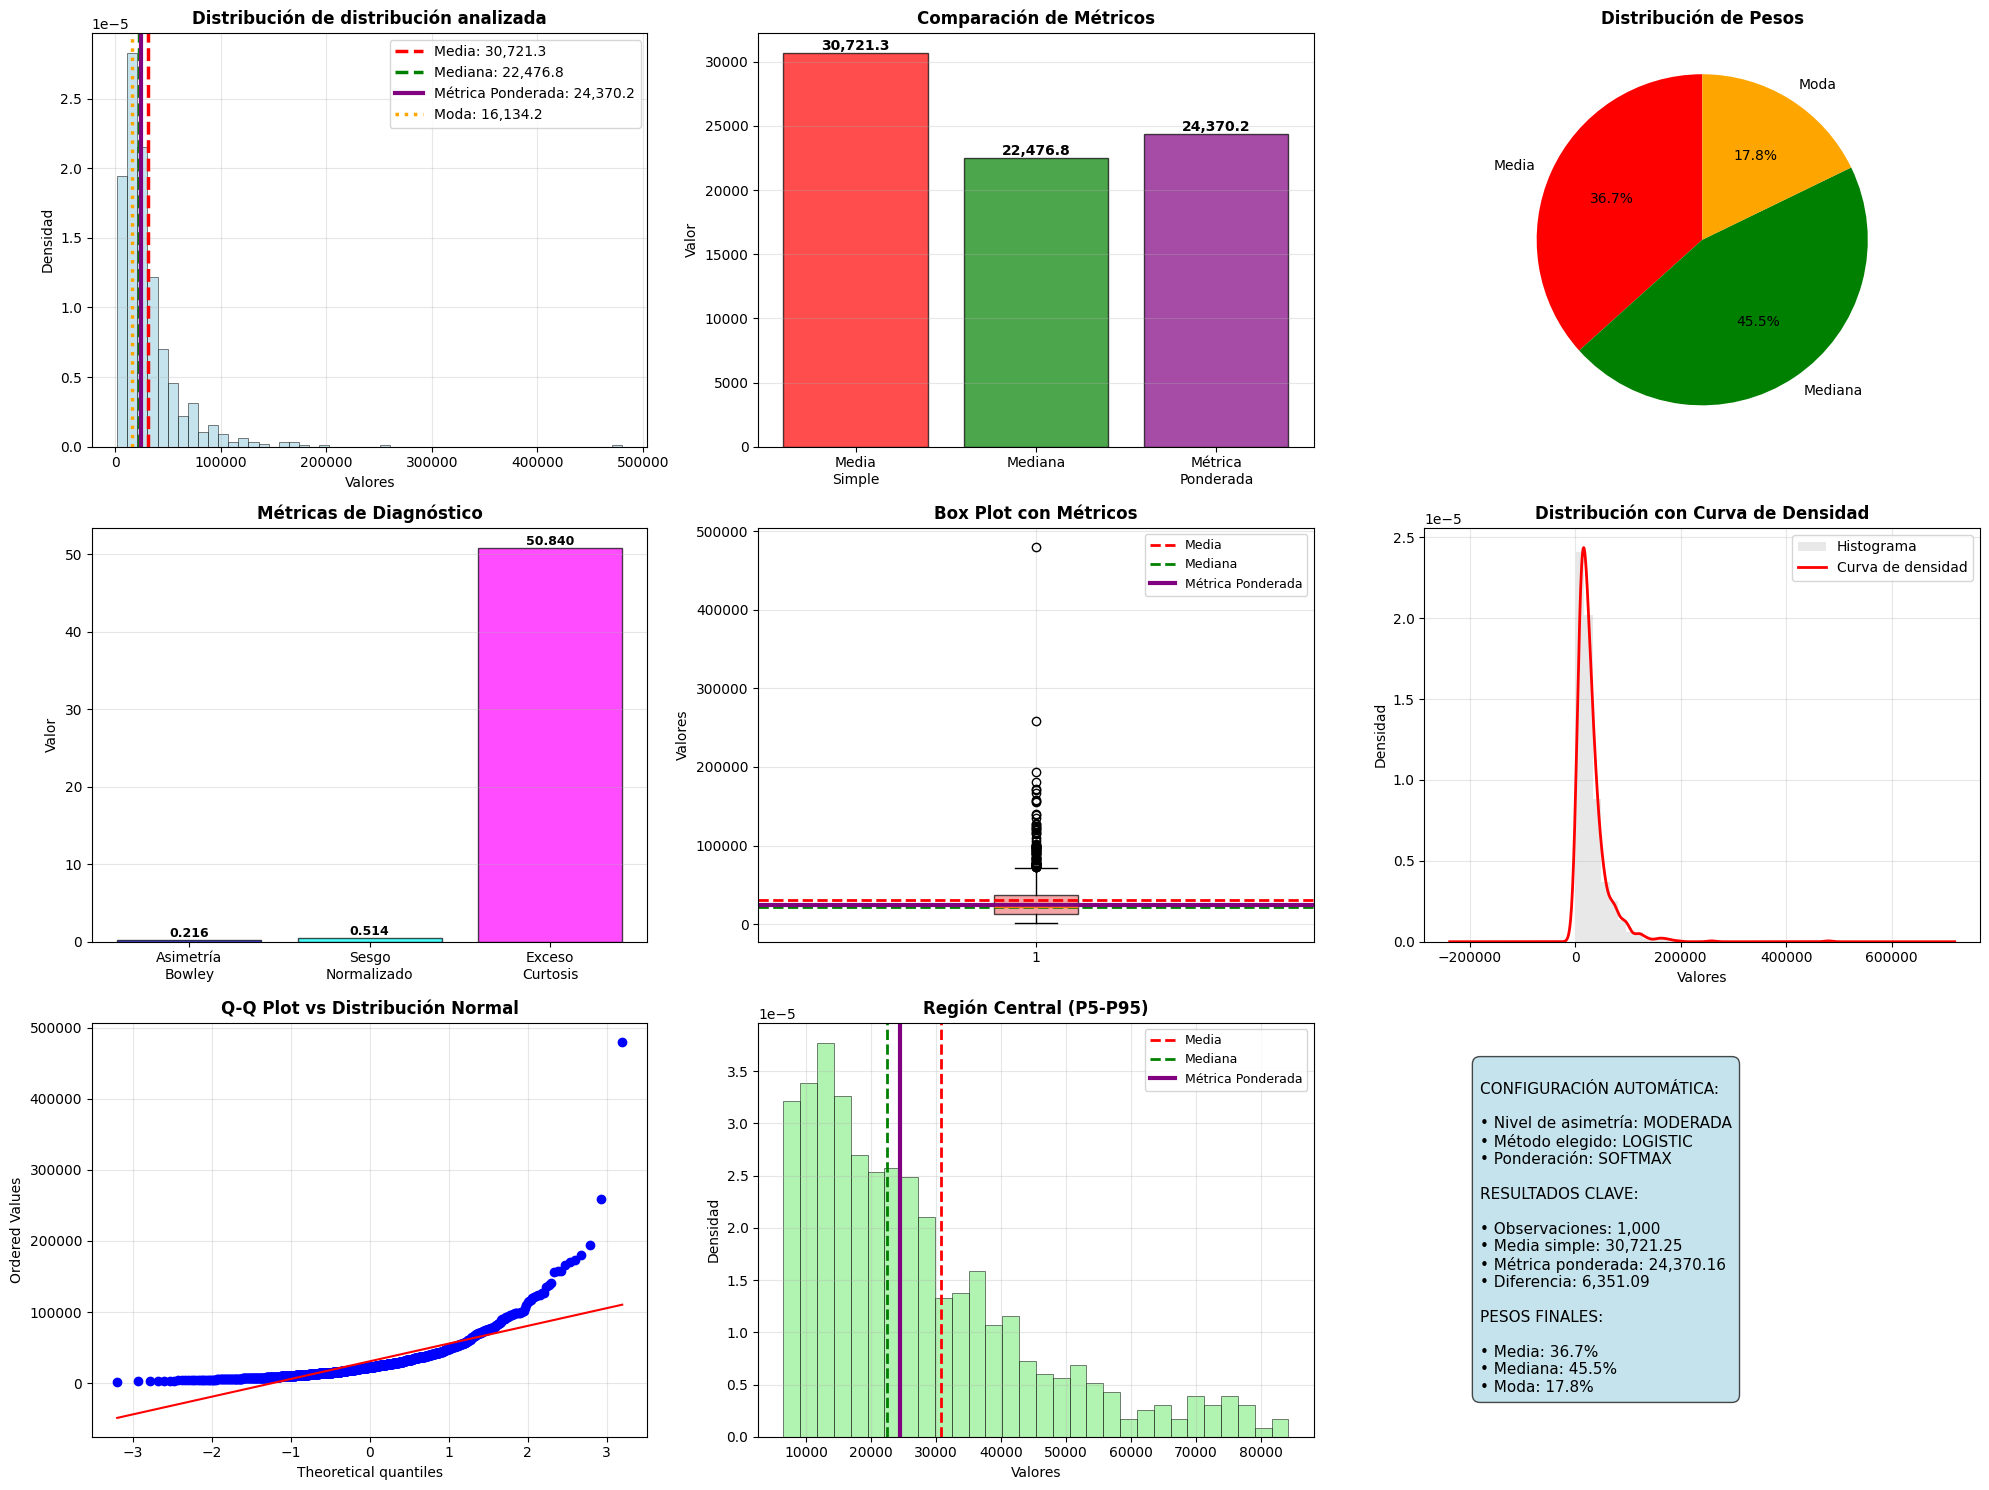

✅ Visualizaciones creadas exitosamente
📊 Interpretación:
   🟡 Tu distribución tiene asimetría moderada - la métrica ponderada mejora la representatividad


In [ ]:
# ========== VISUALIZACIONES COMPREHENSIVAS ==========

def crear_visualizaciones(datos, resultado_auto, nombre_datos="tus datos"):
    """
    Crea un conjunto completo de visualizaciones para entender los resultados
    """
    
    if resultado_auto is None:
        print("❌ No hay resultados para visualizar. Ejecuta primero el análisis automático.")
        return
    
    resultado = resultado_auto['resultado']
    diagnostico = resultado_auto['diagnostico']
    
    # Configurar el estilo de las gráficas
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 15))
    
    print(f"📊 CREANDO VISUALIZACIONES PARA: {nombre_datos}")
    print("=" * 70)
    
    # ========== GRÁFICO 1: DISTRIBUCIÓN PRINCIPAL ==========
    ax1 = plt.subplot(3, 3, 1)
    ax1.hist(datos, bins=min(50, len(datos)//10), alpha=0.7, color='lightblue', 
             density=True, edgecolor='black', linewidth=0.5)
    
    # Líneas verticales para medidas de tendencia central
    ax1.axvline(resultado['media'], color='red', linestyle='--', linewidth=2.5, 
               label=f'Media: {resultado["media"]:,.1f}')
    ax1.axvline(resultado['mediana'], color='green', linestyle='--', linewidth=2.5, 
               label=f'Mediana: {resultado["mediana"]:,.1f}')
    ax1.axvline(resultado['tendencia_ponderada'], color='purple', linestyle='-', linewidth=3, 
               label=f'Métrica Ponderada: {resultado["tendencia_ponderada"]:,.1f}')
    
    if not pd.isna(resultado['moda']):
        ax1.axvline(resultado['moda'], color='orange', linestyle=':', linewidth=2.5, 
                   label=f'Moda: {resultado["moda"]:,.1f}')
    
    ax1.set_title(f'Distribución de {nombre_datos}', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Valores')
    ax1.set_ylabel('Densidad')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # ========== GRÁFICO 2: COMPARACIÓN DE MÉTRICOS ==========
    ax2 = plt.subplot(3, 3, 2)
    metricas = ['Media\nSimple', 'Mediana', 'Métrica\nPonderada']
    valores = [resultado['media'], resultado['mediana'], resultado['tendencia_ponderada']]
    colores = ['red', 'green', 'purple']
    
    bars = ax2.bar(metricas, valores, color=colores, alpha=0.7, edgecolor='black')
    ax2.set_title('Comparación de Métricos', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Valor')
    
    # Añadir valores en las barras
    for bar, valor in zip(bars, valores):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                 f'{valor:,.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax2.grid(True, alpha=0.3, axis='y')
    
    # ========== GRÁFICO 3: DISTRIBUCIÓN DE PESOS ==========
    ax3 = plt.subplot(3, 3, 3)
    if resultado['peso_moda'] > 0:
        labels = ['Media', 'Mediana', 'Moda']
        sizes = [resultado['peso_media'], resultado['peso_mediana'], resultado['peso_moda']]
        colors = ['red', 'green', 'orange']
    else:
        labels = ['Media', 'Mediana']
        sizes = [resultado['peso_media'], resultado['peso_mediana']]
        colors = ['red', 'green']
    
    wedges, texts, autotexts = ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
                                      startangle=90, textprops={'fontsize': 10})
    ax3.set_title('Distribución de Pesos', fontweight='bold', fontsize=12)
    
    # ========== GRÁFICO 4: MÉTRICAS DE DIAGNÓSTICO ==========
    ax4 = plt.subplot(3, 3, 4)
    metricas_diag = ['Asimetría\nBowley', 'Sesgo\nNormalizado', 'Exceso\nCurtosis']
    valores_diag = [abs(diagnostico['bowley_asimetria']), 
                   diagnostico['sesgo_normalizado'], 
                   abs(diagnostico['exceso_curtosis'])]
    colores_diag = ['blue', 'cyan', 'magenta']
    
    bars_diag = ax4.bar(metricas_diag, valores_diag, color=colores_diag, alpha=0.7, edgecolor='black')
    ax4.set_title('Métricas de Diagnóstico', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Valor')
    
    for bar, valor in zip(bars_diag, valores_diag):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                 f'{valor:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    ax4.grid(True, alpha=0.3, axis='y')
    
    # ========== GRÁFICO 5: BOX PLOT ==========
    ax5 = plt.subplot(3, 3, 5)
    box = ax5.boxplot(datos, patch_artist=True, vert=True)
    box['boxes'][0].set_facecolor('lightcoral')
    box['boxes'][0].set_alpha(0.7)
    
    # Añadir líneas de referencia
    ax5.axhline(resultado['media'], color='red', linestyle='--', linewidth=2, label='Media')
    ax5.axhline(resultado['mediana'], color='green', linestyle='--', linewidth=2, label='Mediana')
    ax5.axhline(resultado['tendencia_ponderada'], color='purple', linestyle='-', linewidth=3, label='Métrica Ponderada')
    
    ax5.set_title('Box Plot con Métricos', fontweight='bold', fontsize=12)
    ax5.set_ylabel('Valores')
    ax5.legend(fontsize=9)
    ax5.grid(True, alpha=0.3)
    
    # ========== GRÁFICO 6: HISTOGRAMA CON CURVA DE DENSIDAD ==========
    ax6 = plt.subplot(3, 3, 6)
    ax6.hist(datos, bins=min(30, len(datos)//20), alpha=0.5, color='lightgray', density=True, 
             label='Histograma')
    
    # Añadir curva de densidad si hay suficientes datos
    if len(datos) > 50:
        try:
            datos.plot(kind='kde', ax=ax6, color='red', linewidth=2, label='Curva de densidad')
        except:
            pass  # Si no se puede calcular KDE, continuar sin él
    
    ax6.set_title('Distribución con Curva de Densidad', fontweight='bold', fontsize=12)
    ax6.set_xlabel('Valores')
    ax6.set_ylabel('Densidad')
    ax6.legend(fontsize=10)
    ax6.grid(True, alpha=0.3)
    
    # ========== GRÁFICO 7: Q-Q PLOT CONTRA NORMAL ==========
    ax7 = plt.subplot(3, 3, 7)
    from scipy import stats
    stats.probplot(datos, dist="norm", plot=ax7)
    ax7.set_title('Q-Q Plot vs Distribución Normal', fontweight='bold', fontsize=12)
    ax7.grid(True, alpha=0.3)
    
    # ========== GRÁFICO 8: REGIÓN CENTRAL (SIN OUTLIERS) ==========
    ax8 = plt.subplot(3, 3, 8)
    # Filtrar región central (percentiles 5-95)
    p5, p95 = np.percentile(datos, [5, 95])
    datos_centrales = datos[(datos >= p5) & (datos <= p95)]
    
    ax8.hist(datos_centrales, bins=min(30, len(datos_centrales)//10), alpha=0.7, 
             color='lightgreen', density=True, edgecolor='black', linewidth=0.5)
    
    # Líneas de referencia en región central
    ax8.axvline(resultado['media'], color='red', linestyle='--', linewidth=2, label='Media')
    ax8.axvline(resultado['mediana'], color='green', linestyle='--', linewidth=2, label='Mediana')
    ax8.axvline(resultado['tendencia_ponderada'], color='purple', linestyle='-', linewidth=3, 
               label='Métrica Ponderada')
    
    ax8.set_title('Región Central (P5-P95)', fontweight='bold', fontsize=12)
    ax8.set_xlabel('Valores')
    ax8.set_ylabel('Densidad')
    ax8.legend(fontsize=9)
    ax8.grid(True, alpha=0.3)
    
    # ========== GRÁFICO 9: RESUMEN DE CONFIGURACIÓN ==========
    ax9 = plt.subplot(3, 3, 9)
    ax9.axis('off')
    
    # Texto con información del análisis
    config_text = f"""
CONFIGURACIÓN AUTOMÁTICA:

• Nivel de asimetría: {diagnostico['nivel_asimetria'].upper()}
• Método elegido: {diagnostico['parametros_elegidos']['method'].upper()}
• Ponderación: {diagnostico['parametros_elegidos']['weight_method'].upper()}

RESULTADOS CLAVE:

• Observaciones: {len(datos):,}
• Media simple: {resultado['media']:,.2f}
• Métrica ponderada: {resultado['tendencia_ponderada']:,.2f}
• Diferencia: {abs(resultado['tendencia_ponderada'] - resultado['media']):,.2f}

PESOS FINALES:

• Media: {resultado['peso_media']:.1%}
• Mediana: {resultado['peso_mediana']:.1%}"""
    
    if resultado['peso_moda'] > 0:
        config_text += f"\n• Moda: {resultado['peso_moda']:.1%}"
    
    ax9.text(0.1, 0.9, config_text, fontsize=11, verticalalignment='top', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualizaciones creadas exitosamente")
    print("📊 Interpretación:")
    if diagnostico['nivel_asimetria'] == "alta":
        print("   🔴 Tu distribución es altamente asimétrica - la métrica ponderada es muy recomendable")
    elif diagnostico['nivel_asimetria'] == "moderada":
        print("   🟡 Tu distribución tiene asimetría moderada - la métrica ponderada mejora la representatividad")
    else:
        print("   🟢 Tu distribución es relativamente simétrica - ambas métricas son válidas")

# ========== EJECUTAR VISUALIZACIONES ==========
print("🎨 VERIFICANDO DATOS Y CREANDO VISUALIZACIONES...")
print("=" * 70)

if 'resultado_final' in locals() and resultado_final is not None and 'datos' in locals():
    # Determinar nombre de datos para visualizaciones
    nombre_para_viz = nombre_datos if 'nombre_datos' in locals() else "datos analizados"
    
    print(f"✅ Datos y resultados encontrados")
    print(f"📊 Creando visualizaciones para: {nombre_para_viz}")
    print("🎨 Generando 9 gráficos comprehensivos...")
    print()
    
    crear_visualizaciones(datos, resultado_final, nombre_para_viz)
    
elif 'datos' not in locals() or datos is None:
    print("❌ No se encontraron datos válidos para visualizar")
    print("💡 Regresa al PASO 1 y carga tus datos")
    
elif 'resultado_final' not in locals() or resultado_final is None:
    print("❌ No se encontraron resultados de análisis para visualizar")
    print("💡 Ejecuta primero el PASO 2 (Análisis Automático)")
    
else:
    print("❌ Error inesperado al preparar visualizaciones")
    print("💡 Verifica que hayas ejecutado correctamente los pasos anteriores")

## **Paso 4: Uso Avanzado (Opcional)** ⚙️

Si quieres **mayor control** sobre el análisis, puedes usar la función `metrica_ponderada()` directamente con parámetros personalizados.

🚀 EJECUTANDO EJEMPLOS DE USO AVANZADO...
⚙️  EJEMPLOS DE USO AVANZADO

🔸 CONFIGURACIÓN 1: CONSERVADORA (solo media-mediana)
   • Resultado: 28700.326
   • Peso media: 0.755
   • Peso mediana: 0.245

🔸 CONFIGURACIÓN 2: AGRESIVA (todas las optimizaciones)
   • Resultado: 23468.341
   • Peso media: 0.342
   • Peso mediana: 0.370
   • Peso moda: 0.288

🔸 CONFIGURACIÓN 3: FORZAR SOLO MEDIANA
   • Resultado: 22889.060
   • Peso media: 0.050
   • Peso mediana: 0.950

🔸 CONFIGURACIÓN 4: OPTIMIZADA PARA DATOS FINANCIEROS
   • Resultado: 22889.060
   • Peso media: 0.050
   • Peso mediana: 0.950

📊 COMPARACIÓN DE TODAS LAS CONFIGURACIONES:
----------------------------------------------------------------------
   • Automática     :  24370.158
   • Conservadora   :  28700.326
   • Agresiva       :  23468.341
   • Solo Mediana   :  22889.060
   • Finanzas       :  22889.060
   • Media Simple   :  30721.252
   • Mediana Simple :  22476.839

📈 CREANDO GRÁFICO COMPARATIVO...


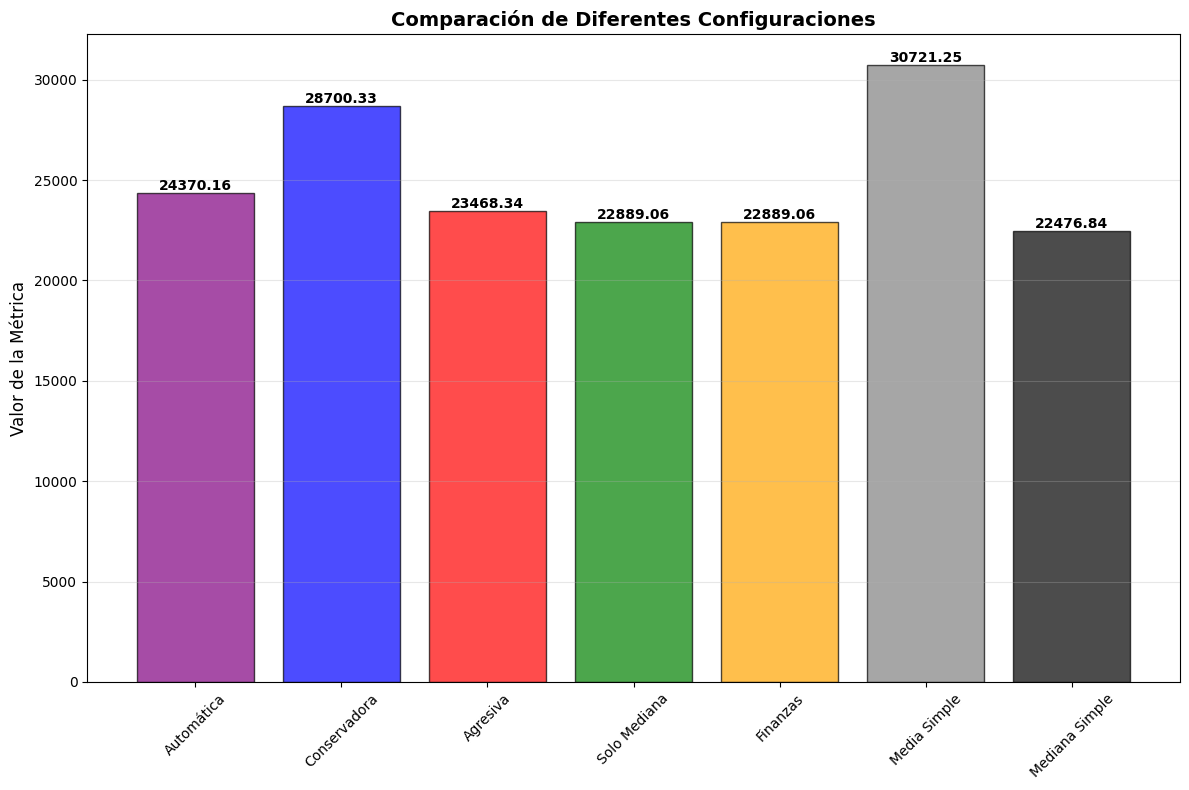


💡 CONSEJOS PARA USO AVANZADO:
--------------------------------------------------
• Usa configuración CONSERVADORA para datos críticos o regulatorios
• Usa configuración AGRESIVA para distribuciones muy asimétricas
• Usa configuración FINANZAS para datos de precios, rendimientos, etc.
• Compara siempre diferentes configuraciones para validar resultados
• La configuración AUTOMÁTICA suele ser la mejor opción general


In [ ]:
# ========== USO AVANZADO CON PARÁMETROS PERSONALIZADOS ==========

def uso_avanzado_ejemplos(datos):
    """
    Demuestra diferentes configuraciones avanzadas de la función metrica_ponderada
    """
    print("⚙️  EJEMPLOS DE USO AVANZADO")
    print("=" * 70)
    
    # ========== CONFIGURACIÓN 1: CONSERVADORA ==========
    print("\n🔸 CONFIGURACIÓN 1: CONSERVADORA (solo media-mediana)")
    resultado_conservador = metrica_ponderada(
        datos,
        method="linear",           # Mapeo menos agresivo
        incluir_moda=False,        # Sin moda
        use_kurtosis=False,        # Sin ajuste por curtosis
        use_bowley=False,          # Sin ajuste por Bowley
        temperature=1.0,           # Menos agresivo
        clip=(0.1, 0.9)           # Más conservador
    )
    
    print(f"   • Resultado: {resultado_conservador['tendencia_ponderada']:.3f}")
    print(f"   • Peso media: {resultado_conservador['peso_media']:.3f}")
    print(f"   • Peso mediana: {resultado_conservador['peso_mediana']:.3f}")
    
    # ========== CONFIGURACIÓN 2: AGRESIVA ==========
    print("\n🔸 CONFIGURACIÓN 2: AGRESIVA (todas las optimizaciones)")
    resultado_agresivo = metrica_ponderada(
        datos,
        method="exponential",      # Mapeo más agresivo
        incluir_moda=True,         # Incluir moda
        moda_robusta=True,         # Validar robustez de moda
        use_kurtosis=True,         # Ajuste por curtosis
        use_bowley=True,           # Ajuste por Bowley
        weight_method="convex",    # Pesos convexos
        temperature=0.3,           # Más agresivo
        clip=(0.01, 0.99)         # Menos restrictivo
    )
    
    print(f"   • Resultado: {resultado_agresivo['tendencia_ponderada']:.3f}")
    print(f"   • Peso media: {resultado_agresivo['peso_media']:.3f}")
    print(f"   • Peso mediana: {resultado_agresivo['peso_mediana']:.3f}")
    print(f"   • Peso moda: {resultado_agresivo['peso_moda']:.3f}")
    
    # ========== CONFIGURACIÓN 3: SOLO MEDIANA ==========
    print("\n🔸 CONFIGURACIÓN 3: FORZAR SOLO MEDIANA")
    resultado_mediana = metrica_ponderada(
        datos,
        method="linear",
        incluir_moda=False,
        temperature=0.1,           # Muy agresivo hacia mediana
        s_max=0.1                 # Umbral muy bajo
    )
    
    print(f"   • Resultado: {resultado_mediana['tendencia_ponderada']:.3f}")
    print(f"   • Peso media: {resultado_mediana['peso_media']:.3f}")
    print(f"   • Peso mediana: {resultado_mediana['peso_mediana']:.3f}")
    
    # ========== CONFIGURACIÓN 4: PERSONALIZADA PARA FINANZAS ==========
    print("\n🔸 CONFIGURACIÓN 4: OPTIMIZADA PARA DATOS FINANCIEROS")
    resultado_finanzas = metrica_ponderada(
        datos,
        method="logistic",         # Buen balance
        usar_medida_robusta=True,  # MADN en lugar de desv. std
        incluir_moda=False,        # Los datos financieros rara vez tienen moda clara
        use_kurtosis=True,         # Los datos financieros suelen tener colas pesadas
        use_bowley=True,           # Asimetría robusta importante
        temperature=0.5,
        alpha=1.0,                # Penalización moderada
        clip=(0.05, 0.95)
    )
    
    print(f"   • Resultado: {resultado_finanzas['tendencia_ponderada']:.3f}")
    print(f"   • Peso media: {resultado_finanzas['peso_media']:.3f}")
    print(f"   • Peso mediana: {resultado_finanzas['peso_mediana']:.3f}")
    
    # ========== COMPARACIÓN DE TODAS LAS CONFIGURACIONES ==========
    print(f"\n📊 COMPARACIÓN DE TODAS LAS CONFIGURACIONES:")
    print("-" * 70)
    
    configuraciones = {
        "Automática": resultado_final['resultado']['tendencia_ponderada'] if 'resultado_final' in globals() and resultado_final is not None else None,
        "Conservadora": resultado_conservador['tendencia_ponderada'],
        "Agresiva": resultado_agresivo['tendencia_ponderada'],
        "Solo Mediana": resultado_mediana['tendencia_ponderada'],
        "Finanzas": resultado_finanzas['tendencia_ponderada'],
        "Media Simple": datos.mean(),
        "Mediana Simple": datos.median()
    }
    
    for nombre, valor in configuraciones.items():
        if valor is not None:
            print(f"   • {nombre:<15}: {valor:>10.3f}")
    
    # ========== GRÁFICO COMPARATIVO ==========
    print(f"\n📈 CREANDO GRÁFICO COMPARATIVO...")
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Preparar datos para el gráfico
    nombres = []
    valores = []
    colores = ['purple', 'blue', 'red', 'green', 'orange', 'gray', 'black']
    
    for i, (nombre, valor) in enumerate(configuraciones.items()):
        if valor is not None:
            nombres.append(nombre)
            valores.append(valor)
    
    # Crear gráfico de barras
    bars = ax.bar(nombres, valores, color=colores[:len(nombres)], alpha=0.7, edgecolor='black')
    
    # Personalizar gráfico
    ax.set_title('Comparación de Diferentes Configuraciones', fontweight='bold', fontsize=14)
    ax.set_ylabel('Valor de la Métrica', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Añadir valores en las barras
    for bar, valor in zip(bars, valores):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{valor:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    return {
        'conservador': resultado_conservador,
        'agresivo': resultado_agresivo,
        'mediana': resultado_mediana,
        'finanzas': resultado_finanzas
    }

# ========== VERIFICAR Y EJECUTAR EJEMPLOS AVANZADOS ==========
print("⚙️  VERIFICANDO DATOS PARA USO AVANZADO...")
print("=" * 60)

if 'datos' in locals() and datos is not None:
    nombre_para_avanzado = nombre_datos if 'nombre_datos' in locals() else "datos cargados"
    
    print(f"✅ Datos encontrados: {nombre_para_avanzado}")
    print(f"? Observaciones: {len(datos):,}")
    print("?🚀 Ejecutando ejemplos de configuraciones avanzadas...")
    print()
    
    resultados_avanzados = uso_avanzado_ejemplos(datos)
    
    print(f"\n💡 CONSEJOS PARA USO AVANZADO:")
    print("-" * 50)
    print("• Usa configuración CONSERVADORA para datos críticos o regulatorios")
    print("• Usa configuración AGRESIVA para distribuciones muy asimétricas")
    print("• Usa configuración FINANZAS para datos de precios, rendimientos, etc.")
    print("• Compara siempre diferentes configuraciones para validar resultados")
    print("• La configuración AUTOMÁTICA suele ser la mejor opción general")
    
    print(f"\n🎯 CONFIGURACIÓN RECOMENDADA PARA TUS DATOS:")
    if 'resultado_final' in locals() and resultado_final is not None:
        diagnostico = resultado_final['diagnostico']
        if diagnostico['nivel_asimetria'] == "alta":
            print("   🔴 Alta asimetría → Considera la configuración AGRESIVA")
        elif diagnostico['nivel_asimetria'] == "moderada":
            print("   🟡 Asimetría moderada → La configuración AUTOMÁTICA es óptima")
        else:
            print("   🟢 Baja asimetría → La configuración CONSERVADORA es suficiente")
    
else:
    print("❌ No se encontraron datos válidos para el uso avanzado")
    print("💡 Regresa al PASO 1 y carga tus datos correctamente")
    print("📋 O ejecuta primero los pasos anteriores en orden")
    resultados_avanzados = None

## **Paso 5: Resumen y Exportación** 📋

### **Resumen de tus resultados**

Si has ejecutado todas las celdas anteriores, ahora tienes:

✅ **Análisis automático completo** de tu distribución  
✅ **Métrica ponderada optimizada** más robusta que la media simple  
✅ **Visualizaciones comprehensivas** para entender los resultados  
✅ **Comparación con diferentes configuraciones** (si ejecutaste el uso avanzado)  

### **¿Qué hacer con los resultados?**

1. **Usa la métrica ponderada** en lugar de la media simple para tus análisis
2. **Documenta la metodología** - tienes respaldo matemático sólido
3. **Valida con diferentes configuraciones** si es crítico
4. **Aplica a otros datasets** similares con confianza

### **Exportar resultados:**

In [ ]:
# ========== FUNCIÓN DE EXPORTACIÓN Y RESUMEN FINAL ==========

def exportar_resultados(datos, resultado_auto, nombre_archivo="resultados_metrica_ponderada"):
    """
    Exporta los resultados del análisis a diferentes formatos
    """
    if resultado_auto is None:
        print("❌ No hay resultados para exportar")
        return
    
    resultado = resultado_auto['resultado']
    diagnostico = resultado_auto['diagnostico']
    
    print("📋 PREPARANDO RESUMEN FINAL Y EXPORTACIÓN...")
    print("=" * 70)
    
    # ========== CREAR RESUMEN COMPLETO ==========
    resumen = {
        'Análisis': {
            'Observaciones': len(datos),
            'Rango_min': float(datos.min()),
            'Rango_max': float(datos.max()),
            'Media_simple': float(datos.mean()),
            'Mediana': float(datos.median()),
            'Desviacion_std': float(datos.std()),
            'Asimetria_momentos': float(datos.skew()),
            'Curtosis_momentos': float(datos.kurtosis())
        },
        'Diagnostico_automatico': {
            'Nivel_asimetria': diagnostico['nivel_asimetria'],
            'Asimetria_Bowley': float(diagnostico['bowley_asimetria']),
            'Sesgo_normalizado': float(diagnostico['sesgo_normalizado']),
            'Exceso_curtosis': float(diagnostico['exceso_curtosis']),
            'Curtosis_significativa': diagnostico['curtosis_significativa'],
            'Usar_moda': diagnostico['usar_moda'],
            'Moda_robusta': diagnostico.get('moda_robusta', False)
        },
        'Configuracion_elegida': diagnostico['parametros_elegidos'],
        'Resultados_finales': {
            'Media_aritmetica': float(resultado['media']),
            'Mediana': float(resultado['mediana']),
            'Moda_KDE': float(resultado['moda']) if not pd.isna(resultado['moda']) else None,
            'Metrica_ponderada': float(resultado['tendencia_ponderada']),
            'Peso_media': float(resultado['peso_media']),
            'Peso_mediana': float(resultado['peso_mediana']),
            'Peso_moda': float(resultado['peso_moda']),
            'MADN': float(resultado['MADN']),
            'Diferencia_vs_media': float(abs(resultado['tendencia_ponderada'] - resultado['media'])),
            'Diferencia_relativa_pct': float(abs(resultado['tendencia_ponderada'] - resultado['media']) / resultado['media'] * 100)
        }
    }
    
    # ========== MOSTRAR RESUMEN EN PANTALLA ==========
    print("📊 RESUMEN FINAL DE RESULTADOS:")
    print("-" * 50)
    print(f"🎯 MÉTRICA PONDERADA RECOMENDADA: {resultado['tendencia_ponderada']:,.3f}")
    print(f"📈 vs Media simple: {resultado['media']:,.3f}")
    print(f"💰 Diferencia absoluta: {abs(resultado['tendencia_ponderada'] - resultado['media']):,.3f}")
    print(f"📊 Diferencia relativa: {abs(resultado['tendencia_ponderada'] - resultado['media']) / resultado['media'] * 100:.2f}%")
    
    print(f"\n⚙️  CONFIGURACIÓN AUTOMÁTICA ELEGIDA:")
    print(f"   • Nivel de asimetría: {diagnostico['nivel_asimetria'].upper()}")
    print(f"   • Método: {diagnostico['parametros_elegidos']['method'].upper()}")
    print(f"   • Ponderación: {diagnostico['parametros_elegidos']['weight_method'].upper()}")
    
    print(f"\n⚖️  DISTRIBUCIÓN DE PESOS:")
    print(f"   • Media: {resultado['peso_media']:.1%}")
    print(f"   • Mediana: {resultado['peso_mediana']:.1%}")
    if resultado['peso_moda'] > 0:
        print(f"   • Moda: {resultado['peso_moda']:.1%}")
    
    # ========== GUARDAR EN DIFERENTES FORMATOS ==========
    try:
        # 1. Guardar como JSON
        import json
        with open(f"{nombre_archivo}.json", 'w', encoding='utf-8') as f:
            json.dump(resumen, f, indent=4, ensure_ascii=False)
        print(f"\n✅ Resultados guardados en: {nombre_archivo}.json")
        
        # 2. Guardar como CSV (solo resultados principales)
        resultados_csv = pd.DataFrame({
            'Metrica': ['Media_simple', 'Mediana', 'Metrica_ponderada'],
            'Valor': [resultado['media'], resultado['mediana'], resultado['tendencia_ponderada']],
            'Peso': [resultado['peso_media'], resultado['peso_mediana'], 1.0]  # Para la media simple, peso = 1
        })
        resultados_csv.to_csv(f"{nombre_archivo}.csv", index=False, encoding='utf-8')
        print(f"✅ Tabla de resultados guardada en: {nombre_archivo}.csv")
        
        # 3. Crear reporte en texto
        with open(f"{nombre_archivo}_reporte.txt", 'w', encoding='utf-8') as f:
            f.write("REPORTE DE ANÁLISIS - MÉTRICA PONDERADA PARA DISTRIBUCIONES ASIMÉTRICAS\n")
            f.write("=" * 80 + "\n\n")
            f.write(f"Fecha de análisis: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Observaciones analizadas: {len(datos):,}\n\n")
            
            f.write("RESULTADOS PRINCIPALES:\n")
            f.write("-" * 30 + "\n")
            f.write(f"Media aritmética simple: {resultado['media']:,.3f}\n")
            f.write(f"Mediana: {resultado['mediana']:,.3f}\n")
            f.write(f"Métrica ponderada (recomendada): {resultado['tendencia_ponderada']:,.3f}\n\n")
            
            f.write("DIAGNÓSTICO AUTOMÁTICO:\n")
            f.write("-" * 30 + "\n")
            f.write(f"Nivel de asimetría: {diagnostico['nivel_asimetria']}\n")
            f.write(f"Asimetría de Bowley: {diagnostico['bowley_asimetria']:.4f}\n")
            f.write(f"Método elegido: {diagnostico['parametros_elegidos']['method']}\n")
            f.write(f"Ponderación elegida: {diagnostico['parametros_elegidos']['weight_method']}\n\n")
            
            f.write("RECOMENDACIÓN:\n")
            f.write("-" * 30 + "\n")
            if diagnostico['nivel_asimetria'] == "alta":
                f.write("La distribución presenta ALTA asimetría. Se recomienda fuertemente usar la métrica ponderada.\n")
            elif diagnostico['nivel_asimetria'] == "moderada":
                f.write("La distribución presenta asimetría MODERADA. La métrica ponderada mejora la representatividad.\n")
            else:
                f.write("La distribución es relativamente SIMÉTRICA. Ambas métricas son válidas.\n")
        
        print(f"✅ Reporte completo guardado en: {nombre_archivo}_reporte.txt")
        
    except Exception as e:
        print(f"⚠️  Error al guardar archivos: {e}")
        print("💡 Los resultados siguen disponibles en memoria")
    
    # ========== INSTRUCCIONES FINALES ==========
    print(f"\n🎯 PRÓXIMOS PASOS RECOMENDADOS:")
    print("-" * 50)
    print("1. Usa la métrica ponderada en tus análisis futuros")
    print("2. Documenta la metodología en tus reportes")
    print("3. Aplica la misma herramienta a datasets similares")
    print("4. Comparte los archivos generados con tu equipo")
    
    if abs(resultado['tendencia_ponderada'] - resultado['media']) / resultado['media'] * 100 > 5:
        print("\n🔴 NOTA IMPORTANTE:")
        print("   La diferencia entre la métrica ponderada y la media simple es significativa.")
        print("   Considera usar la métrica ponderada para decisiones importantes.")
    
    return resumen

# ========== FUNCIÓN DE AYUDA RÁPIDA ==========
def ayuda_rapida():
    """
    Muestra un resumen rápido de cómo usar la herramienta
    """
    print("🚀 GUÍA RÁPIDA DE USO:")
    print("=" * 50)
    print("1. CARGAR DATOS:")
    print("   • datos, df = cargar_desde_archivo('archivo.csv', 'columna')")
    print("   • datos = cargar_desde_lista([1,2,3,4,5], 'mi_variable')")
    print("   • datos = generar_datos_ejemplo('ingresos')")
    print()
    print("2. ANÁLISIS AUTOMÁTICO:")
    print("   • resultado = analizar_datos_completo(datos)")
    print()
    print("3. VISUALIZAR:")
    print("   • crear_visualizaciones(datos, resultado)")
    print()
    print("4. EXPORTAR:")
    print("   • exportar_resultados(datos, resultado, 'mi_analisis')")
    print()
    print("💡 Para uso avanzado, consulta la documentación de metrica_ponderada()")

# ========== VERIFICAR Y EJECUTAR EXPORTACIÓN ==========
print("📋 VERIFICANDO DATOS Y RESULTADOS PARA EXPORTACIÓN...")
print("=" * 70)

if 'resultado_final' in locals() and resultado_final is not None and 'datos' in locals() and datos is not None:
    # Determinar nombre del archivo basándose en el origen de los datos
    if 'datos_origen' in locals():
        if datos_origen == "archivo_usuario":
            nombre_archivo_base = "analisis_archivo_usuario"
        elif datos_origen == "lista_usuario":
            nombre_archivo_base = "analisis_lista_usuario"
        else:
            nombre_archivo_base = "analisis_datos_ejemplo"
    else:
        nombre_archivo_base = "analisis_metrica_ponderada"
    
    nombre_para_export = nombre_datos if 'nombre_datos' in locals() else "datos analizados"
    
    print(f"✅ Datos y resultados encontrados")
    print(f"📊 Datos analizados: {nombre_para_export}")
    print(f"📁 Nombre base de archivos: {nombre_archivo_base}")
    print("📋 Generando resumen final y archivos de exportación...")
    print()
    
    resumen_final = exportar_resultados(datos, resultado_final, nombre_archivo_base)
    
    print(f"\n" + "=" * 80)
    print("🎉 ¡ANÁLISIS COMPLETADO CON ÉXITO!")
    print("📁 Archivos generados y listos para usar")
    print("📊 Métrica ponderada calculada y validada")
    print(f"🎯 Datos analizados: {nombre_para_export}")
    print("=" * 80)
    
elif 'datos' not in locals() or datos is None:
    print("❌ No se encontraron datos válidos para exportar")
    print("💡 Regresa al PASO 1 y carga tus datos correctamente")
    
elif 'resultado_final' not in locals() or resultado_final is None:
    print("❌ No se encontraron resultados de análisis para exportar")
    print("💡 Ejecuta primero el PASO 2 (Análisis Automático)")
    
else:
    print("❌ Error inesperado al preparar exportación")
    print("💡 Verifica que hayas ejecutado correctamente todos los pasos anteriores")

print(f"\n📚 PARA VER LA GUÍA RÁPIDA DE USO:")
print("   ayuda_rapida()")

📋 GENERANDO RESUMEN FINAL Y EXPORTANDO RESULTADOS...
📋 PREPARANDO RESUMEN FINAL Y EXPORTACIÓN...
📊 RESUMEN FINAL DE RESULTADOS:
--------------------------------------------------
🎯 MÉTRICA PONDERADA RECOMENDADA: 24,370.158
📈 vs Media simple: 30,721.252
💰 Diferencia absoluta: 6,351.094
📊 Diferencia relativa: 20.67%

⚙️  CONFIGURACIÓN AUTOMÁTICA ELEGIDA:
   • Nivel de asimetría: MODERADA
   • Método: LOGISTIC
   • Ponderación: SOFTMAX

⚖️  DISTRIBUCIÓN DE PESOS:
   • Media: 36.7%
   • Mediana: 45.5%
   • Moda: 17.8%
⚠️  Error al guardar archivos: Object of type bool is not JSON serializable
💡 Los resultados siguen disponibles en memoria

🎯 PRÓXIMOS PASOS RECOMENDADOS:
--------------------------------------------------
1. Usa la métrica ponderada en tus análisis futuros
2. Documenta la metodología en tus reportes
3. Aplica la misma herramienta a datasets similares
4. Comparte los archivos generados con tu equipo

🔴 NOTA IMPORTANTE:
   La diferencia entre la métrica ponderada y la media si

## **Documentación y Referencias** 📚

### **¿Qué acabas de usar?**

Has utilizado un **sistema avanzado de análisis estadístico** que implementa:

- **📊 Estimación robusta de la moda** mediante Kernel Density Estimation (KDE)
- **📈 Medidas de asimetría robustas** (Bowley skewness)  
- **⚖️ Ponderación adaptativa** con múltiples métodos (softmax, convex weights)
- **🤖 Sistema de decisión automática** basado en características de la distribución
- **🛡️ Validación de robustez** ante valores extremos

### **Fundamentos matemáticos:**

1. **MADN (Median Absolute Deviation Normalized)**: `1.4826 × median(|x - median(x)|)`
2. **Asimetría de Bowley**: `(Q₃ + Q₁ - 2Q₂) / (Q₃ - Q₁)`
3. **Ponderación softmax**: `wᵢ = exp(-dᵢ/T) / Σexp(-dⱼ/T)`
4. **Mapeo logístico**: `w = 1 / (1 + (s/s₀)ᵖ)`

### **Casos de uso recomendados:**

✅ **Datos de ingresos** y salarios  
✅ **Precios** y variables financieras  
✅ **Tiempos** de espera o respuesta  
✅ **Cualquier distribución asimétrica** con valores extremos  
✅ **Análisis de políticas públicas**  
✅ **Investigación académica**  

### **Referencias académicas:**

- Bowley, A.L. (1920). *Elements of Statistics*
- Rousseeuw, P.J. & Croux, C. (1993). "Alternatives to the median absolute deviation"
- Silverman, B.W. (1986). *Density Estimation for Statistics and Data Analysis*
- Maronna, R.A. et al. (2019). *Robust Statistics: Theory and Methods*

### **Soporte y contacto:**

Para preguntas técnicas o mejoras, contacta al desarrollador del sistema: https://github.com/AGAYON

---

**¡Gracias por usar la herramienta de Métrica Ponderada para Representatividad Distributiva!** 🎉